In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import OrderedDict

# Load data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
train_x = train['x']
train_y = train['y']

test_x = test['x']
test_y = test['y']

In [6]:
train_x.head()

0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
Name: x, dtype: float64

In [7]:
print("Total number of training examples:%d" %(len(train_x)))
print("Total number of testing examples:%d" %(len(test_x)))

Total number of training examples:700
Total number of testing examples:300


# Visualize data

<b>Plotting Train Data</b>

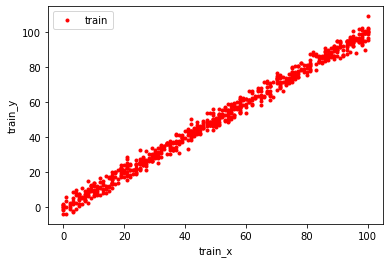

In [8]:
plt.plot(train_x, train_y, 'r.', label = 'train')
plt.xlabel('train_x')
plt.ylabel('train_y')
plt.legend()
plt.show()

<b>Plotting Test Data</b>

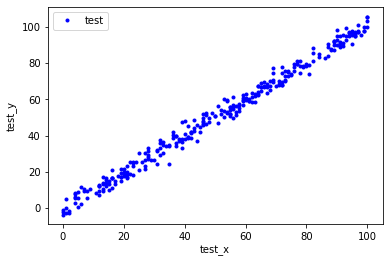

In [9]:
plt.plot(test_x, test_y, 'b.', label = 'test')
plt.xlabel('test_x')
plt.ylabel('test_y')
plt.legend()
plt.show()

In [10]:
def linear_reg(train_x, train_y, lr=0.0001, epochs=10):
    n = len(train_x)
    
    a0 = np.zeros((n))
    a1 = np.zeros((n))
    
    itr = 0
    while itr < epochs:
        y_predict = a0 + a1 * train_x
        error = (y_predict - train_y)
        sq_error = error**2
        mean_sq_error = np.sum(sq_error) / n
        
        d_a0 = 2 * np.sum(error) / n
        d_a1 = 2 * np.sum(error * train_x) / n
        
        # parameters update
        a0 = a0 - lr * d_a0
        a1 = a1 - lr * d_a1
        
        print("loss after %d iterations: %.3f" %(itr, mean_sq_error))
        itr += 1
    
    return a0, a1

In [11]:
def visualize_model_predictions(test_x, test_y, a0, a1):
    y_predictions = []
    for i in range(100):
        y_predict = a0 + a1 * i
        y_predictions.append(y_predict)
    
    plt.plot(test_x, test_y, 'b.', label='test')
    line_values = range(len(y_predictions))
    plt.plot(list(line_values), y_predictions, color='black', label='predict')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.ylabel('y_values')
    plt.xlabel('x_values')
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

In [12]:
a0, a1 = linear_reg(train_x, train_y)

loss after 0 iterations: 3335.353
loss after 1 iterations: 377.030
loss after 2 iterations: 48.818
loss after 3 iterations: 12.404
loss after 4 iterations: 8.364
loss after 5 iterations: 7.916
loss after 6 iterations: 7.866
loss after 7 iterations: 7.861
loss after 8 iterations: 7.860
loss after 9 iterations: 7.860


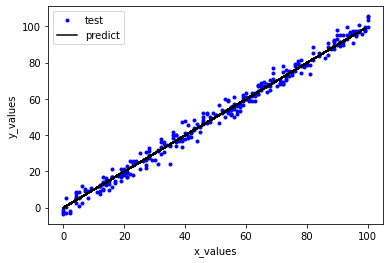

In [13]:
visualize_model_predictions(test_x, test_y, a0, a1)